In [2]:
import csv
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers
import tensorflow as tf
import matplotlib.pyplot as plt

2023-09-11 00:20:09.564575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
csv_uri = "../data_dwt.csv"
data = pd.read_csv(csv_uri)
data.head()


,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,label
0,../data/DWT/MR/New_MR_013.wav,-347.060059,154.943558,93.783775,50.840019,23.242395,17.596910,4.110154,-0.807275,-5.689566,...,-2.919746,-2.823685,-1.773055,-1.268906,-1.999369,-2.199473,-1.266334,-0.934605,-1.214915,MR
1,../data/DWT/MR/New_MR_174.wav,-367.880310,144.878494,66.058075,32.868752,11.143324,5.073028,-5.344355,-6.968643,-9.318007,...,-1.317642,-2.707654,-2.072164,-1.451433,-2.278844,-1.087114,-1.206650,-0.956287,1.023186,MR
2,../data/DWT/MR/New_MR_182.wav,-369.281830,149.215317,67.535118,31.597643,8.938406,5.797061,-6.082140,-7.110550,-8.396078,...,0.615875,-0.999691,-1.715029,-2.823087,-2.328232,-1.655435,-0.727405,-0.387556,-0.455690,MR
3,../data/DWT/MR/New_MR_005.wav,-338.519958,163.969498,104.493279,59.541115,29.155334,25.178791,9.755602,1.182870,-4.286720,...,-1.640303,-4.263682,-2.385725,-1.368697,-2.428553,-2.532720,-1.132026,-0.605487,-1.341941,MR
4,../data/DWT/MR/New_MR_067.wav,-369.079163,146.236969,67.267311,32.914185,5.516921,5.811962,-6.018693,-5.761757,-9.477714,...,0.606613,-1.936086,-2.712914,-1.293168,-2.921399,-1.866392,-0.576819,0.597677,-0.688666,MR


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1000 non-null   object 
 1   mfcc1     1000 non-null   float64
 2   mfcc2     1000 non-null   float64
 3   mfcc3     1000 non-null   float64
 4   mfcc4     1000 non-null   float64
 5   mfcc5     1000 non-null   float64
 6   mfcc6     1000 non-null   float64
 7   mfcc7     1000 non-null   float64
 8   mfcc8     1000 non-null   float64
 9   mfcc9     1000 non-null   float64
 10  mfcc10    1000 non-null   float64
 11  mfcc11    1000 non-null   float64
 12  mfcc12    1000 non-null   float64
 13  mfcc13    1000 non-null   float64
 14  mfcc14    1000 non-null   float64
 15  mfcc15    1000 non-null   float64
 16  mfcc16    1000 non-null   float64
 17  mfcc17    1000 non-null   float64
 18  mfcc18    1000 non-null   float64
 19  mfcc19    1000 non-null   float64
 20  mfcc20    1000 non-null   float

In [5]:
# scaler = StandardScaler()
X = data.drop(['label', 'filename'], axis=1)
# X = scaler.fit_transform(X)
# X = np.reshape(X, (-1, X.shape[0], X.shape[1], 1))
y = data.iloc[:, -1]

In [6]:
X.shape

(1000, 40)

In [7]:
y.head()

0    MR
1    MR
2    MR
3    MR
4    MR
Name: label, dtype: object

In [8]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
0,-347.060059,154.943558,93.783775,50.840019,23.242395,17.596910,4.110154,-0.807275,-5.689566,-5.340101,...,-2.548066,-2.919746,-2.823685,-1.773055,-1.268906,-1.999369,-2.199473,-1.266334,-0.934605,-1.214915
1,-367.880310,144.878494,66.058075,32.868752,11.143324,5.073028,-5.344355,-6.968643,-9.318007,-6.880295,...,-0.248255,-1.317642,-2.707654,-2.072164,-1.451433,-2.278844,-1.087114,-1.206650,-0.956287,1.023186
2,-369.281830,149.215317,67.535118,31.597643,8.938406,5.797061,-6.082140,-7.110550,-8.396078,-7.182023,...,-1.208616,0.615875,-0.999691,-1.715029,-2.823087,-2.328232,-1.655435,-0.727405,-0.387556,-0.455690
3,-338.519958,163.969498,104.493279,59.541115,29.155334,25.178791,9.755602,1.182870,-4.286720,-3.268204,...,-2.040156,-1.640303,-4.263682,-2.385725,-1.368697,-2.428553,-2.532720,-1.132026,-0.605487,-1.341941
4,-369.079163,146.236969,67.267311,32.914185,5.516921,5.811962,-6.018693,-5.761757,-9.477714,-7.793673,...,-0.576460,0.606613,-1.936086,-2.712914,-1.293168,-2.921399,-1.866392,-0.576819,0.597677,-0.688666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-236.778275,104.781090,20.491060,34.180210,-14.081140,14.821692,-13.962186,3.099241,-12.628239,-2.007240,...,0.283606,1.898762,-0.601248,0.122331,0.776731,-0.705266,0.381840,-1.313438,1.042395,0.122775
996,-220.734985,108.668640,13.357530,33.048771,-11.010205,13.386050,-12.045707,4.583494,-11.303714,-0.140056,...,-2.147348,-0.159508,1.711888,1.111986,-0.309244,-0.122423,0.033410,-0.635935,0.975563,0.547473
997,-379.933197,137.581177,80.509674,56.486790,19.300636,17.256010,1.336557,2.302434,-4.236915,-6.990869,...,0.038339,0.584104,-0.569754,-0.073454,2.114784,3.911527,5.070141,5.099153,3.336697,2.794245
998,-362.115295,134.416794,71.094795,54.970631,18.930120,20.774111,1.412645,2.543084,-6.117993,-6.582720,...,-0.287383,0.984050,1.768873,1.649260,2.025107,1.703686,1.878069,2.150758,2.802971,2.476108


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
y_test.shape

(200,)

In [11]:
X_train.shape

(800, 40)

In [12]:
X_train

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,mfcc31,mfcc32,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40
29,-390.218689,144.457932,68.054176,33.760040,5.431626,5.549845,-7.199593,-4.865239,-8.595184,-6.839489,...,-1.228056,-0.645031,-1.721797,-2.036236,-1.171013,-2.273304,-1.939350,-1.408900,-0.167837,1.068441
535,-386.592560,125.737007,70.191971,38.158596,18.064508,14.447897,10.127077,8.419982,6.776073,4.445445,...,-12.825522,-10.604064,-9.077128,-6.631274,-4.178072,-3.730054,-3.125820,-1.491021,-0.619021,-0.906941
695,-328.925964,141.313599,81.161362,47.208420,22.921484,23.353655,10.434552,9.080319,2.519944,1.723609,...,-4.660887,-4.154865,-2.236835,-2.850498,-4.126644,-2.421237,-1.103691,-0.969063,-0.514704,-2.240407
557,-409.955994,65.122955,35.354023,23.492975,16.316204,14.866294,8.149846,6.092806,5.344875,2.374804,...,0.158566,0.011572,-0.865890,-0.189259,-0.135539,-0.366719,0.038941,0.881885,-0.241826,-1.033453
836,-279.823914,170.643417,41.615673,39.203194,1.327468,4.004666,-10.136061,-4.265648,-7.695158,-4.039304,...,-0.199052,0.008218,-1.733744,-1.620366,-1.959483,-0.987057,-0.665269,-1.407984,-0.418611,-0.407413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-370.661682,149.505173,67.669403,35.368610,4.775095,5.909390,-6.295845,-4.123252,-6.328403,-7.549837,...,-0.639466,-1.055437,-0.054711,-1.428659,-2.887799,-2.536524,-1.423908,-0.302943,0.133205,-0.225754
270,-433.802704,95.991699,66.191498,38.953857,21.720955,15.892527,6.137618,0.641169,-1.095944,-3.608827,...,-0.392920,0.151226,-0.221003,-0.451999,-0.560689,-1.996904,-1.634305,-1.607962,-1.548770,-1.779616
860,-412.104889,105.473427,65.553650,33.819786,13.435740,9.770302,3.967386,1.769103,1.144341,-0.862799,...,-6.818473,-7.653781,-8.512366,-6.711857,-5.838939,-4.858912,-4.587398,-3.359204,-2.159195,-1.244287
435,-380.257080,110.199387,58.791973,36.025810,18.709284,15.038707,8.033163,7.363794,5.660741,7.752574,...,-15.503897,-13.184659,-9.078391,-5.915298,-4.107523,-3.384882,-2.629016,-2.765176,-3.339826,-3.338659


In [13]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)



(200,)
(800, 40, 1)
(200, 40, 1)


In [14]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [15]:
# make RNN model
def build_model():
    model = models.Sequential(
        [
            layers.SimpleRNN(64, input_shape=(X_train.shape[1], X_train.shape[2])),
            layers.Dense(64, activation="relu"),
            layers.Dense(32, activation="relu"),
            layers.Dropout(0.2),
            layers.Dense(5, activation="softmax"),
        ]
    )

    return model

In [16]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 10,629
Trainable params: 10,629
Non-trainable params: 0
_________________________________________________________________


2023-09-11 00:20:40.335176: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-11 00:20:40.337448: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [17]:
optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
25/25 [==============================] - 3s 52ms/step - loss: 1.5942 - acc: 0.3100 - val_loss: 1.5774 - val_acc: 0.3050
Epoch 2/30
25/25 [==============================] - 1s 34ms/step - loss: 1.5420 - acc: 0.3450 - val_loss: 1.5310 - val_acc: 0.3200
Epoch 3/30
25/25 [==============================] - 1s 49ms/step - loss: 1.5003 - acc: 0.3900 - val_loss: 1.4916 - val_acc: 0.3400
Epoch 4/30
25/25 [==============================] - 1s 38ms/step - loss: 1.4699 - acc: 0.3887 - val_loss: 1.4549 - val_acc: 0.3750
Epoch 5/30
25/25 [==============================] - 1s 45ms/step - loss: 1.4389 - acc: 0.4100 - val_loss: 1.4200 - val_acc: 0.4300
Epoch 6/30
25/25 [==============================] - 2s 68ms/step - loss: 1.3939 - acc: 0.4625 - val_loss: 1.3802 - val_acc: 0.4400
Epoch 7/30
25/25 [==============================] - 2s 74ms/step - loss: 1.3532 - acc: 0.4875 - val_loss: 1.3345 - val_acc: 0.4700
Epoch 8/30
25/25 [==============================] - 1s 41ms/step - loss: 1.3147 - a

7/7 [==============================] - 0s 56ms/step - loss: 0.7204 - acc: 0.7900
Accuracy on test set is: 0.7900000214576721


Text(0, 0.5, 'Accuracy')

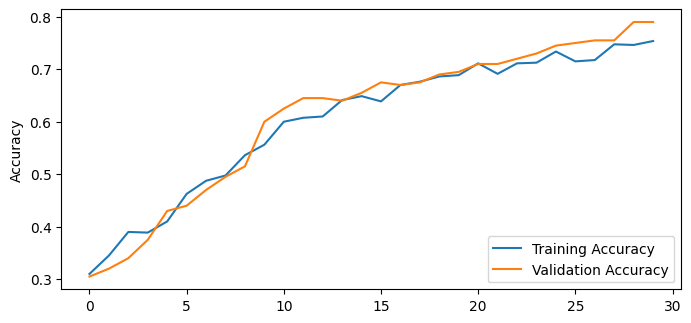

In [19]:
# evaluate model on test set
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))


# plot accuracy/error for training and validation
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')

In [20]:
model_uri = "../modelh5/model_RNN.h5"
model.save(model_uri)

In [21]:
# confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

7/7 [==============================] - 0s 26ms/step


array([[36,  8,  1,  3,  0],
       [ 2, 26,  2,  2,  1],
       [ 2,  1, 29,  3,  3],
       [ 4,  0,  2, 30,  8],
       [ 0,  0,  0,  0, 37]])

In [22]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        48
           1       0.74      0.79      0.76        33
           2       0.85      0.76      0.81        38
           3       0.79      0.68      0.73        44
           4       0.76      1.00      0.86        37

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.79      0.79      0.79       200



### Testing

In [23]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 64)                4224      
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 5)                 165       
                                                                 
Total params: 10,629
Trainable params: 10,629
Non-trainable params: 0
_________________________________________________________________


In [30]:
import wave
import json
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' label'
header = header.split()


def extract_mfcc(audiofile):
    file = open('test.csv', 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    mfcc = librosa.feature.mfcc(y=y, sr=8000, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    to_append = f'Signal'
    for e in mfcc:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predict(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv('test.csv')
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')

In [31]:
predict('../data/training/MS/New_MS_003.wav')

1/1 [==============================] - 0s 178ms/step
[0.06812153 0.0842158  0.65987426 0.09359349 0.09419494]
2
Predicted class: MS
